In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import librosa
from librosa import display

import winsound
import wavio

# Data Check

## 讀資料

In [2]:
filename = "tmp_audio/clnsp0.wav"
audio = tf.io.read_file(filename)
data, sr = tf.audio.decode_wav(audio)

print("data: ", data.shape)
print("sr: ",sr)
data = tf.reshape(data, [len(data)])
print("reshape data: ",data.shape)

data:  (176320, 1)
sr:  tf.Tensor(16000, shape=(), dtype=int32)
reshape data:  (176320,)


In [3]:
winsound.PlaySound(filename, winsound.SND_FILENAME)

## stft

In [4]:
S = tf.signal.stft(data,frame_length=320 ,fft_length=320,frame_step=80)
S = tf.expand_dims(S,axis=-1)
S = tf.expand_dims(S,axis=0)
print(S.shape)

(1, 2201, 161, 1)


In [6]:
CNN1 = tf.keras.layers.Conv2D(filters=16 , kernel_size=(2,3), strides=(1,2),activation="elu")
CNN2 = tf.keras.layers.Conv2D(filters=32 , kernel_size=(2,3), strides=(1,2),activation="elu")
CNN3 = tf.keras.layers.Conv2D(filters=64 , kernel_size=(2,3), strides=(1,2),activation="elu")
CNN4 = tf.keras.layers.Conv2D(filters=128 , kernel_size=(2,3), strides=(1,2),activation="elu")
CNN5 = tf.keras.layers.Conv2D(filters=256 , kernel_size=(2,3), strides=(1,2),activation="elu")
print(S.shape)
print("Encoder")
out = CNN1(S)
print(out.shape)
out = CNN2(out)
print(out.shape)
out = CNN3(out)
print(out.shape)
out = CNN4(out)
print(out.shape)
out = CNN5(out)
print(out.shape)

out = tf.reshape(out,shape=[out.shape[0],-1,1024])
print(out.shape)

out = tf.keras.layers.LSTM(1024,return_sequences=True)(out)
out = tf.keras.layers.LSTM(1024,return_sequences=True)(out)
print(out.shape)

out = tf.reshape(out,shape=[out.shape[0],-1,4,256])
print(out.shape)

DCNN1 = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(2,3), strides=(1,2))
DCNN2 = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(2,3), strides=(1,2))
DCNN3 = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(2,3), strides=(1,2))
DCNN4 = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=(2,3), strides=(1,2),output_padding=(0,1))
DCNN5 = tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(2,3), strides=(1,2))
print("Decoder：")
print(out.shape)
out = DCNN1(out)
print(out.shape)
out = DCNN2(out)
print(out.shape)
out = DCNN3(out)
print(out.shape)
out = DCNN4(out)
print(out.shape)
out = DCNN5(out)
print(out.shape)

(1, 2201, 161, 1)
Encoder


InvalidArgumentError: Value for attr 'T' of complex64 is not in the list of allowed values: half, bfloat16, float, double, int32
	; NodeDef: {{node Conv2D}}; Op<name=Conv2D; signature=input:T, filter:T -> output:T; attr=T:type,allowed=[DT_HALF, DT_BFLOAT16, DT_FLOAT, DT_DOUBLE, DT_INT32]; attr=strides:list(int); attr=use_cudnn_on_gpu:bool,default=true; attr=padding:string,allowed=["SAME", "VALID", "EXPLICIT"]; attr=explicit_paddings:list(int),default=[]; attr=data_format:string,default="NHWC",allowed=["NHWC", "NCHW"]; attr=dilations:list(int),default=[1, 1, 1, 1]> [Op:Conv2D]

In [28]:
S = tf.signal.stft(data, frame_length=320,frame_step=80,fft_length=320)
# S = tf.expand_dims(S,axis=0)
print(S.shape)
'''
S_hat = tf.signal.inverse_stft(S,frame_length=2048,frame_step=512)

print(S.shape)
'''

S = tf.transpose(S)

(2201, 161)


## 畫 stft 圖

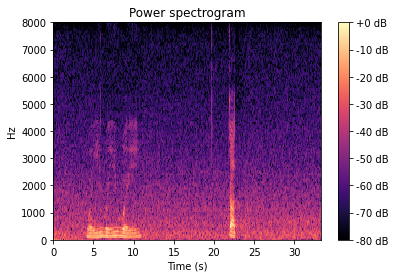

In [25]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),
                               sr=sr,
                               y_axis='linear', 
                               x_axis='s', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

# Dataset

# Init

In [39]:
tmp = tf.constant([[1,2],[3,4],[5,6]])
tmp.shape[0]

3

In [42]:
tmp = tf.reshape(tmp,shape=[2,3])
tmp

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [30]:
test = tf.random.uniform([4,10,5],dtype=tf.dtypes.int32,maxval=100)

In [31]:
test

<tf.Tensor: shape=(4, 10, 5), dtype=int32, numpy=
array([[[22, 35, 63, 50, 10],
        [50, 57, 15, 72, 65],
        [77, 44, 69, 84,  7],
        [46, 58, 85, 68, 24],
        [78, 53, 82, 51, 83],
        [91, 73, 35, 75,  9],
        [37, 55, 12,  5, 14],
        [75, 97, 93, 18, 51],
        [85, 50, 95, 89, 41],
        [29, 13,  5, 81, 74]],

       [[93, 27, 16, 20, 18],
        [82, 47, 88, 75, 12],
        [53, 54, 91, 23, 27],
        [79, 41, 87, 46, 80],
        [46, 39, 26, 40, 16],
        [55, 68, 10, 57, 35],
        [15, 42, 10, 77, 84],
        [66, 97, 99,  1,  1],
        [29, 70,  1, 20,  7],
        [92, 15, 97, 89, 14]],

       [[84, 34, 15, 54, 68],
        [73, 26, 61, 34, 57],
        [ 7, 66, 25, 96, 55],
        [94, 24, 97, 10, 93],
        [46, 75, 50, 45, 86],
        [24, 60,  2, 93,  7],
        [61, 92, 96, 30,  5],
        [70, 36, 72, 27, 24],
        [42, 59, 23, 51, 75],
        [52, 42, 84, 24,  8]],

       [[46, 28, 33, 15, 79],
        [47, 7

In [32]:
test = tf.transpose(test,perm=[1,0,2])
test = tf.reshape(test,[10,20])
test

<tf.Tensor: shape=(10, 20), dtype=int32, numpy=
array([[22, 35, 63, 50, 10, 93, 27, 16, 20, 18, 84, 34, 15, 54, 68, 46,
        28, 33, 15, 79],
       [50, 57, 15, 72, 65, 82, 47, 88, 75, 12, 73, 26, 61, 34, 57, 47,
        78, 78, 64, 16],
       [77, 44, 69, 84,  7, 53, 54, 91, 23, 27,  7, 66, 25, 96, 55, 83,
        83, 73, 44, 24],
       [46, 58, 85, 68, 24, 79, 41, 87, 46, 80, 94, 24, 97, 10, 93,  2,
        44, 14, 41, 20],
       [78, 53, 82, 51, 83, 46, 39, 26, 40, 16, 46, 75, 50, 45, 86, 15,
        58, 82, 95, 92],
       [91, 73, 35, 75,  9, 55, 68, 10, 57, 35, 24, 60,  2, 93,  7, 79,
        50, 26, 12, 74],
       [37, 55, 12,  5, 14, 15, 42, 10, 77, 84, 61, 92, 96, 30,  5, 93,
        19, 79, 91, 56],
       [75, 97, 93, 18, 51, 66, 97, 99,  1,  1, 70, 36, 72, 27, 24,  6,
        62, 92, 30, 90],
       [85, 50, 95, 89, 41, 29, 70,  1, 20,  7, 42, 59, 23, 51, 75, 62,
        86, 76, 17,  6],
       [29, 13,  5, 81, 74, 92, 15, 97, 89, 14, 52, 42, 84, 24,  8, 94,
       